In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

- pelvic_incidence
- pelvic_tilt
- lumbar_lordosis_angle
- sacral_slope
- pelvic_radius
- degree_spondylolisthesis
- pelvic_slope
- Direct_tilt
- thoracic_slope
- cervical_tilt
- sacrum_angle
- scoliosis_slope

In [3]:
bp = pd.read_csv('backpain.csv',usecols=range(13))
bp.columns = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
              'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt',
              'sacrum_angle','scoliosis_slope','status']
bp.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [5]:
bp['status'].value_counts()

Abnormal    210
Normal      100
Name: status, dtype: int64

In [6]:
bp.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
status                      0
dtype: int64

In [7]:
bp['status'].describe()

count          310
unique           2
top       Abnormal
freq           210
Name: status, dtype: object

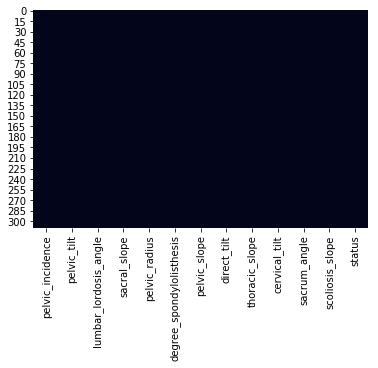

In [8]:
sns.heatmap(bp.isnull(),cbar=False)
plt.show()

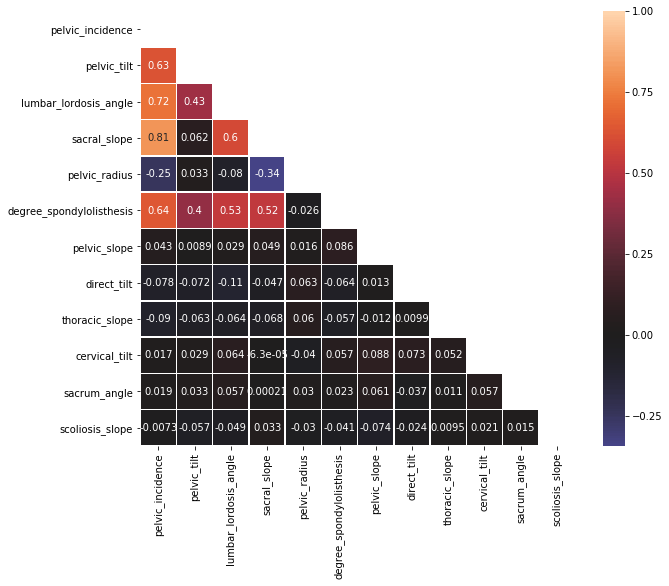

In [9]:
plt.figure(figsize=(10,8))

corr_bp = bp.corr()
mask = np.zeros_like(corr_bp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(bp.corr(), annot=True, mask=mask, center=0, square=True, linewidths=0.5)
plt.show()

In [10]:
bp_status = bp.groupby('status')
bp_normal = bp_status.get_group('Normal')
bp_abnormal = bp_status.get_group('Abnormal')

In [11]:
stats.shapiro(bp_normal['pelvic_incidence'])

(0.9573341608047485, 0.002607749542221427)

In [12]:
stats.shapiro(bp_abnormal['pelvic_incidence'])

(0.9792839884757996, 0.003460382577031851)

In [13]:
stats.bartlett(bp_normal['pelvic_incidence'],bp_abnormal['pelvic_incidence'])

BartlettResult(statistic=15.386302459147464, pvalue=8.762115666952999e-05)

In [14]:
stats.mannwhitneyu(bp_normal['pelvic_incidence'],bp_abnormal['pelvic_incidence'])

MannwhitneyuResult(statistic=5820.0, pvalue=1.1260773170594985e-10)

In [15]:
stats.f_oneway(bp_normal['pelvic_incidence'],bp_abnormal['pelvic_incidence'])

F_onewayResult(statistic=43.938147520704675, pvalue=1.516337137438033e-10)

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(bp['pelvic_incidence'], bp['status'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower    upper  reject
------------------------------------------------
Abnormal Normal -13.0073 -16.8685 -9.1461  True 
------------------------------------------------
['Abnormal' 'Normal']


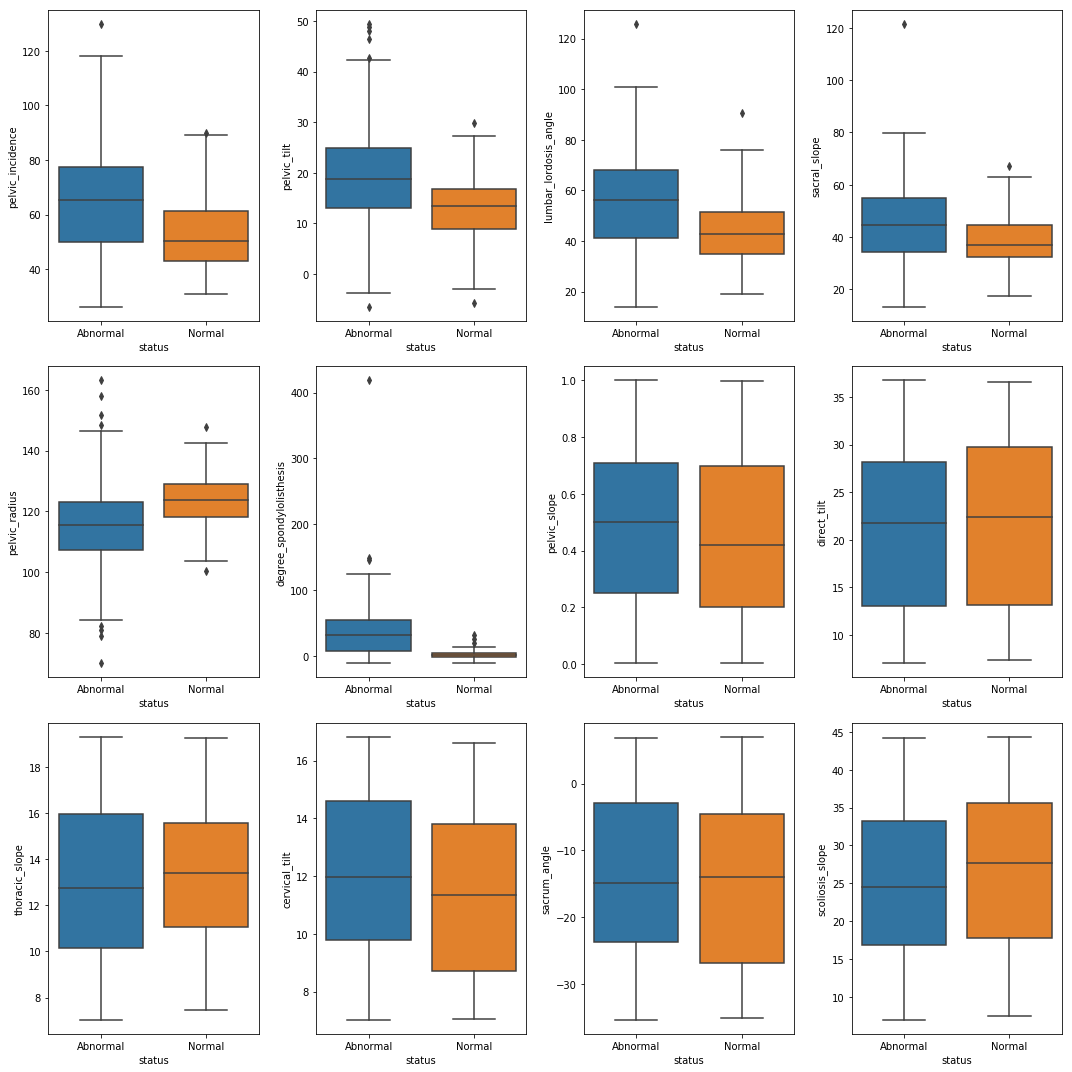

In [17]:
fig,ax = plt.subplots(3,4,figsize=(15,15))
ax = ax.flatten()
for i in range(0,len(bp.columns)-1):
    sns.boxplot(x='status',y=bp.iloc[:,i],data=bp,orient='v',ax=ax[i])
    
plt.tight_layout()
plt.show()

In [18]:
bp.loc[bp.status=='Abnormal','status'] = 1
bp.loc[bp.status=='Normal','status'] = 0
bp['status'].value_counts()

1    210
0    100
Name: status, dtype: int64

In [19]:
x = bp.drop('status',axis=1)
y = bp['status']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def data_preprocess(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    
    scaler.fit(xtrain)
    
    train_scaled = scaler.transform(xtrain)
    test_scaled = scaler.transform(xtest)
    return (train_scaled,test_scaled,ytrain,ytest)

In [21]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return logreg

In [22]:
xtrain_scaled, xtest_scaled, ytrain, ytest = data_preprocess(x,y)
logreg_result = logistic_regression(xtrain_scaled, ytrain)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain_scaled,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest_scaled,ytest)))

Training set score = 0.871
Test set score = 0.817


In [24]:
import statsmodels.api as sm
logit_model = sm.Logit(ytrain,xtrain_scaled)
result = logit_model.fit()
result.summary2()

         Current function value: 0.473055
         Iterations: 35


C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   status            AIC:               229.3058  
Date:                 2019-08-27 12:01  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 11482676.3676  0.0000 1.0000 -22505632.0452 22505632.2080
x2   0.0765  6545064.3181  0.0000 1.0000 -12828090.2634 12828090.4165
x3  -0.2797        0.3142 -0.8904 0.3733        -0.8955        0.3361
x4  -0.5412  9034732.5670 -0.0000 1.0000 -17707750.9824 17707749.9000
x5  -1.1234        0.2351 -4.7773 0.0000        -1.5842       -0.6625
x6   2.3250        0.4401  5.2832 0.0000         1.4625        3.1875
x7   0.1711        0.1790  0.9561 0.3390        -0.1797        0.5220
x8  -0.2115        0.1770 -1.1950 0.2321        -0.5583        0.1354
x9   0.0724        0.1738  0.4166 0.6770        -0.2683        0.4131
x10  0.2003        0.1772  1.1301 0.2584        -0.1471        0.5476
x11 -0.1042        0.1804 -0.5778 0.5634        -0.4578        0.2493
x12 -0.2749        0.1764 -1.5579 0.1193        -0.6207        0.0709
=====================================================================

"""

In [25]:
# remove highly correlated variables which also had high std error
cols_to_include = [col for col in x.columns if col not in ['pelvic_incidence','pelvic_tilt','sacral_slope']]
x = bp[cols_to_include]

In [26]:
xtrain_scaled, xtest_scaled, ytrain, ytest = data_preprocess(x,y)
logreg_result = logistic_regression(xtrain_scaled, ytrain)
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain_scaled,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest_scaled,ytest)))

Training set score = 0.848
Test set score = 0.742


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
logit_model = sm.Logit(ytrain,xtrain_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: status           AIC:              227.1591  
Date:               2019-08-27 12:01 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3719    -0.5566
x3     2.2963      0.4142     5.5443    0.0000     1.4846     3.1081
x4     0.1499      0.1771     0.8464    0.3974    -0.1972     0.4971
x5    -0.2442      0.1738    -1.4047    0.1601    -0.5849     0.0965
x6     0.0640      0.1732     0.3694    0.7118    -0.2754     0.4034
x7     0.2068      0.1747     1.1841    0.2364    -0.1355     0.5491
x8    -0.1183      0.1777    -0.6660    0.5054    -0.4666     0.2299
x9    -0.2872      0.1736    -1.6547    0.0980    -0.6274     0.0530
=================================================================

"""

In [28]:
# remove variables with which is causing multicollinearity and high std error
cols_to_include = [col for col in bp.columns if col not in ['pelvic_incidence','pelvic_tilt','sacral_slope','status']]
x = bp[cols_to_include]
y = bp['status']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
logreg_result = logistic_regression(xtrain, ytrain)
print('Before Scaling')
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest,ytest)))
print('\nAfter scaling:')
xtrain_scaled, xtest_scaled, ytrain, ytest = data_preprocess(x,y)
logreg_result = logistic_regression(xtrain_scaled, ytrain)
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain_scaled,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest_scaled,ytest)))

Before Scaling
Training set score = 0.839
Test set score = 0.806

After scaling:
Training set score = 0.848
Test set score = 0.742


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# remove independent vars whose p-value > 0.05
cols_to_include = ['pelvic_radius','degree_spondylolisthesis']
x = bp[cols_to_include]
y = bp['status']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
logreg_result = logistic_regression(xtrain, ytrain)
print('Before Scaling')
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest,ytest)))
print('\nAfter scaling:')
xtrain_scaled, xtest_scaled, ytrain, ytest = data_preprocess(x,y)
logreg_result = logistic_regression(xtrain_scaled, ytrain)
print('Training set score = {:.3f}'.format(logreg_result.score(xtrain_scaled,ytrain)))
print('Test set score = {:.3f}'.format(logreg_result.score(xtest_scaled,ytest)))

Before Scaling
Training set score = 0.802
Test set score = 0.763

After scaling:
Training set score = 0.820
Test set score = 0.774


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
cols_to_include = ['pelvic_radius','degree_spondylolisthesis']
x = bp[cols_to_include]
y = bp['status']
xtrain_scaled, xtest_scaled, ytrain, ytest = data_preprocess(x,y)
logreg_result = logistic_regression(xtrain_scaled, ytrain)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
ypred = logreg_result.predict(xtest_scaled)

ypred_str = ypred.astype(str)
ypred_str[np.where(ypred_str == '0')] = 'Normal'
ypred_str[np.where(ypred_str == '1')] = 'Abnormal'

ytest_str = ytest.astype(str)
ytest_str[ytest_str == '0'] = 'Normal'
ytest_str[ytest_str == '1'] = 'Abnormal'

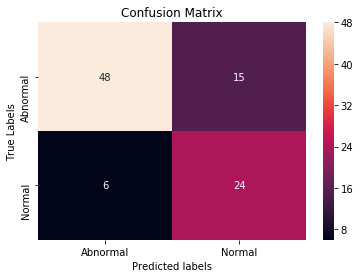

In [32]:
from sklearn.metrics import confusion_matrix
labels = ['Abnormal','Normal']
cm = confusion_matrix(ytest_str,ypred_str,labels)
ax = sns.heatmap(cm,annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [33]:
tp = cm[0,0]
fn = cm[0,1]
fp = cm[1,0]
tn = cm[1,1]

In [34]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Accuracy =',accuracy)
print('Sensitivity =',sensitivity)
print('Specificity =',specificity)

Accuracy = 0.7741935483870968
Sensitivity = 0.7619047619047619
Specificity = 0.8


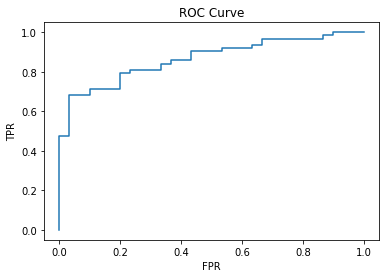

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
yprob = logreg_result.predict_proba(xtest_scaled)
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [36]:
roc_auc_score(ytest,yprob[:,1])

0.8656084656084656

In [40]:
tpr-fpr

array([0.        , 0.01587302, 0.47619048, 0.44285714, 0.64920635,
       0.58253968, 0.61428571, 0.51428571, 0.59365079, 0.56031746,
       0.57619048, 0.47619048, 0.50793651, 0.47460317, 0.49047619,
       0.42380952, 0.47142857, 0.37142857, 0.38730159, 0.28730159,
       0.3031746 , 0.26984127, 0.3015873 , 0.1015873 , 0.11746032,
       0.08412698, 0.1       , 0.        ])